In [1]:
import pandas as pd

In [2]:
# reading the csv file
df_population_raw = pd.read_csv('population_total.csv')

In [3]:
# first look at the dataset
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


# Making a Pivot Table

.pivot(): Returns reshaped DataFrame organized by given index / column values ("pivot without aggregation")

In [4]:
# dropping null values
df_population_raw.dropna(inplace=True)

In [5]:
# making a pivot table
df_pivot = df_population_raw.pivot(index='year',
                                   columns='country',
                                   values='population')

In [6]:
# selecting some countries
df_pivot = df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

In [7]:
# showing pivot table
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# Lineplot

<Axes: title={'center': 'Population (1995-2020)'}, xlabel='Year', ylabel='Population'>

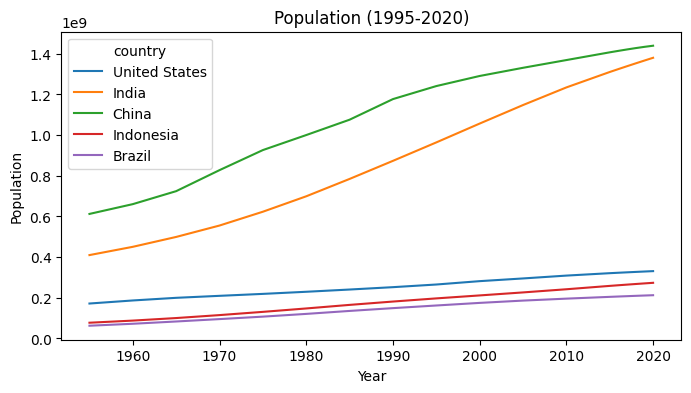

In [8]:
df_pivot.plot(kind='line', 
              xlabel='Year', 
              ylabel='Population', 
              title='Population (1995-2020)', 
              figsize=(8,4))

# Barplot

## Single Barplot

In [9]:
# selecting only one year (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [10]:
# showing new dataframe
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [11]:
# transpose dataframe from rows to columns or viceversa
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Population 2020'}, xlabel='Year', ylabel='Population'>

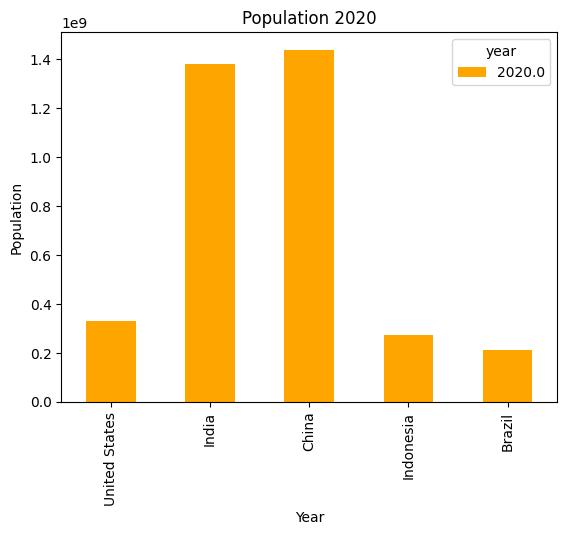

In [12]:
# making barplot
df_pivot_2020.plot(kind='bar', 
                   color='orange', 
                   xlabel='Year', 
                   ylabel='Population', 
                   title='Population 2020')

## Barplot grouped by “n” variables

In [13]:
# selecting a few years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]

<Axes: title={'center': 'Population 1980-2020'}, xlabel='Year', ylabel='Population'>

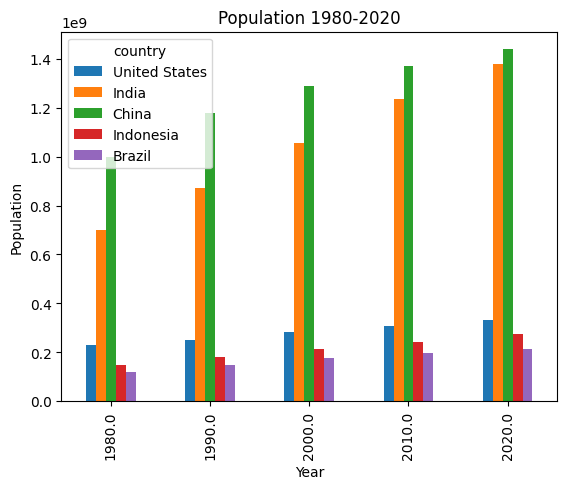

In [14]:
# making grouped barplot
df_pivot_sample.plot(kind='bar', 
                     xlabel='Year', 
                     ylabel='Population', 
                     title='Population 1980-2020')

# Piechart

In [15]:
# changing column name 
df_pivot_2020.rename(columns={2020 : '2020'}, 
                     inplace=True)

<Axes: title={'center': 'Population in 2020(%)'}, ylabel='2020'>

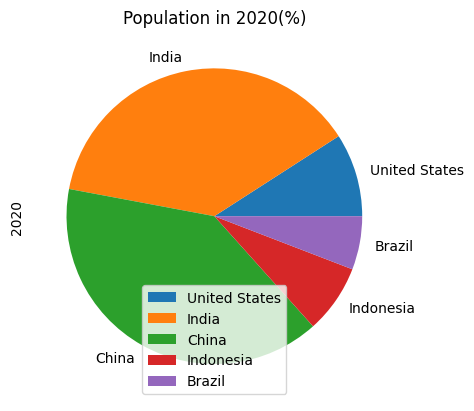

In [16]:
# making the plot
df_pivot_2020.plot(kind='pie', 
                   y='2020', 
                   title='Population in 2020(%)')


# Boxplot

## Single Boxplot

<Axes: ylabel='Population'>

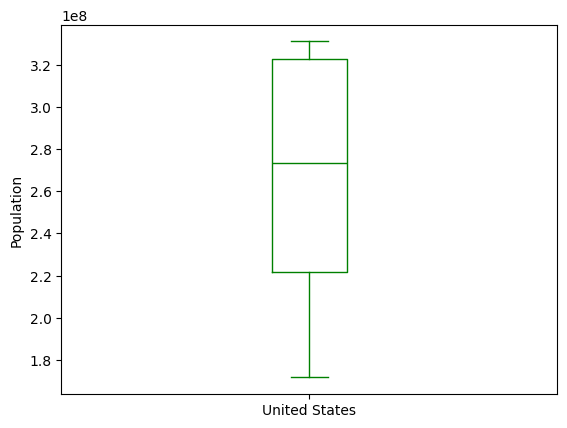

In [17]:
df_pivot['United States'].plot(kind='box', 
                               color='green', 
                               ylabel='Population')

## Multiple Boxplot

<Axes: ylabel='Population'>

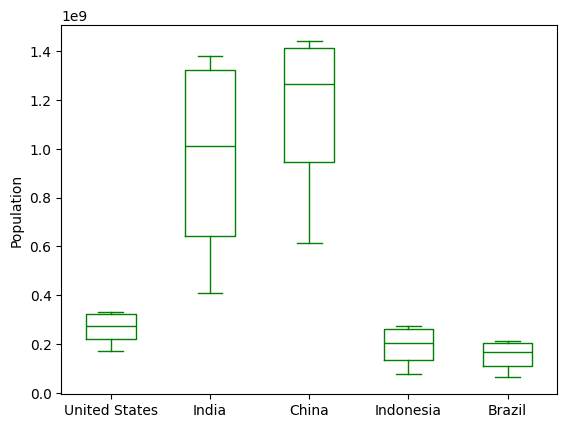

In [18]:
df_pivot.plot(kind='box', 
              color='green', 
              ylabel='Population')

# Histogram

<Axes: ylabel='Frequency'>

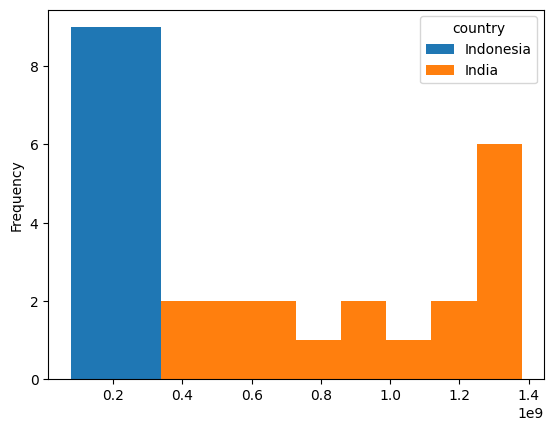

In [21]:
df_pivot[['Indonesia', 'India']].plot(kind='hist')

# ScatterPlot

In [26]:
# selecting a sample of the raw data
df_sample = df_population_raw[df_population_raw['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

<Axes: xlabel='year', ylabel='population'>

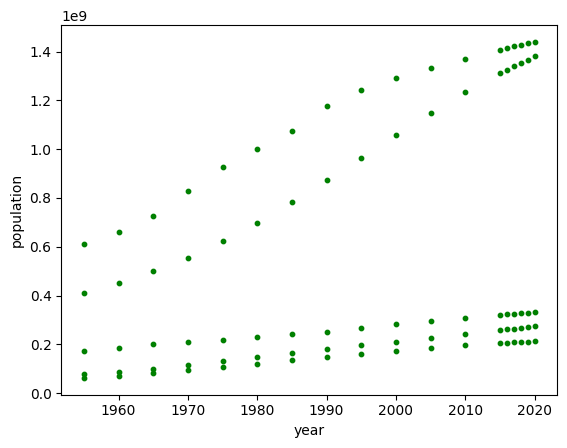

In [ ]:
# creating the plot
df_sample.plot(kind='scatter',
               x='year',
               y='population',
               s=10, #size
               color='green')